# Data Science Job Postings on Glassdoor (Cleaned Dataset)

### Importing Dataset and Data Exploration

In [15]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [16]:
df <- read.csv("Cleaned_DS_Jobs.csv", header=TRUE)

In [17]:
df <- df %>% select(-c("Salary.Estimate", "Job.Description", "Company.Name", "Industry", "Location", "Headquarters", "same_state"))

df


Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,27,0,0,0,0,1,0,0,data scientist,senior
Data Scientist,4.2,5001 to 10000 employees,Company - Public,Business Services,$1 to $2 billion (USD),137,171,154,VA,52,0,0,1,0,0,0,1,data scientist,na
Data Scientist,3.8,1001 to 5000 employees,Private Practice / Firm,Business Services,$100 to $500 million (USD),137,171,154,MA,39,1,1,0,0,1,0,0,data scientist,na
Data Scientist,3.5,501 to 1000 employees,Company - Public,Manufacturing,$100 to $500 million (USD),137,171,154,MA,20,1,1,0,0,1,0,0,data scientist,na
Data Scientist,2.9,51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,137,171,154,NY,22,1,1,0,0,0,0,0,data scientist,na
Data Scientist,4.2,51 to 200 employees,Company - Private,Information Technology,Unknown / Non-Applicable,137,171,154,CA,10,1,1,1,1,0,0,0,data scientist,na
Data Scientist / Machine Learning Expert,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),137,171,154,MA,24,1,0,0,0,0,0,0,data scientist,na
Data Scientist,3.5,1001 to 5000 employees,Company - Public,Retail,$1 to $2 billion (USD),137,171,154,MA,30,1,0,0,0,0,0,0,data scientist,na
Staff Data Scientist - Analytics,4.4,5001 to 10000 employees,Company - Public,Information Technology,$2 to $5 billion (USD),137,171,154,CA,37,0,0,0,0,0,0,0,data scientist,na
Data Scientist,3.6,51 to 200 employees,Company - Private,Information Technology,Unknown / Non-Applicable,137,171,154,IL,6,1,0,0,0,0,0,0,data scientist,na


In [18]:
df <- df[df$Rating != 0.0, ]

head(df, 1)

Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,27,0,0,0,0,1,0,0,data scientist,senior


In [19]:
dim(df)

[1] 610  20

In [20]:
summary(df)

                     Job.Title       Rating                          Size    
 Data Scientist           :287   Min.   :2.000   51 to 200 employees   :125  
 Data Engineer            : 26   1st Qu.:3.500   1001 to 5000 employees:104  
 Senior Data Scientist    : 19   Median :3.800   201 to 500 employees  : 83  
 Machine Learning Engineer: 13   Mean   :3.881   10000+ employees      : 79  
 Data Analyst             : 12   3rd Qu.:4.400   501 to 1000 employees : 77  
 Senior Data Analyst      :  6   Max.   :5.000   1 to 50 employees     : 71  
 (Other)                  :247                   (Other)               : 71  
                      Type.of.ownership                       Sector   
 Company - Private             :369     Information Technology   :174  
 Company - Public              :150     Business Services        :118  
 Nonprofit Organization        : 36     Biotech & Pharmaceuticals: 66  
 Subsidiary or Business Segment: 28     Aerospace & Defense      : 46  
 Government     

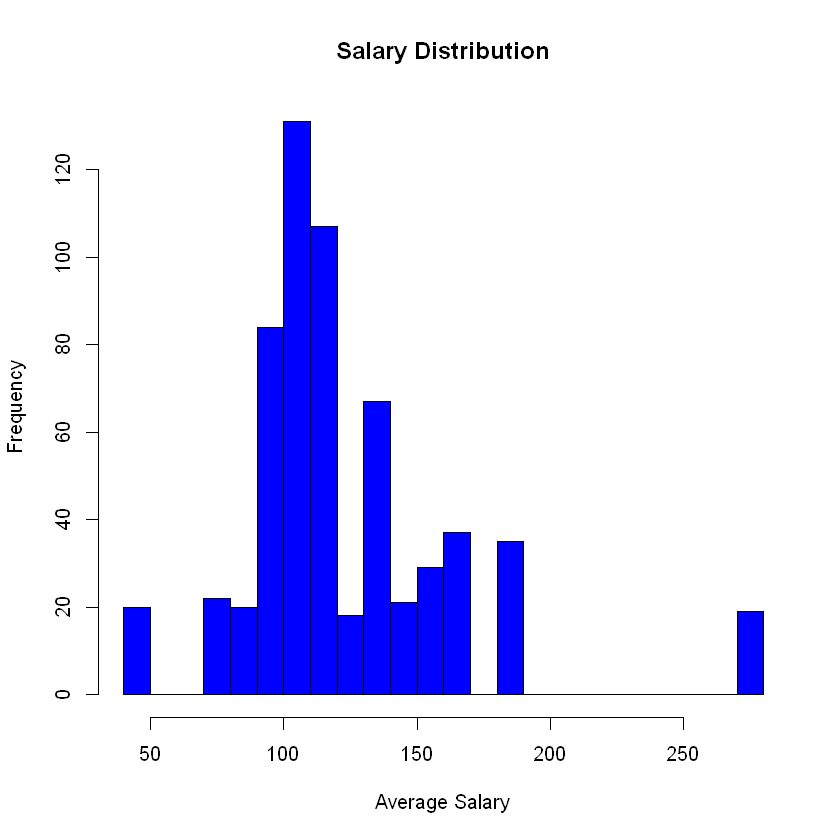

In [21]:
hist(df$avg_salary, breaks=20, main="Salary Distribution", xlab="Average Salary", col="blue")

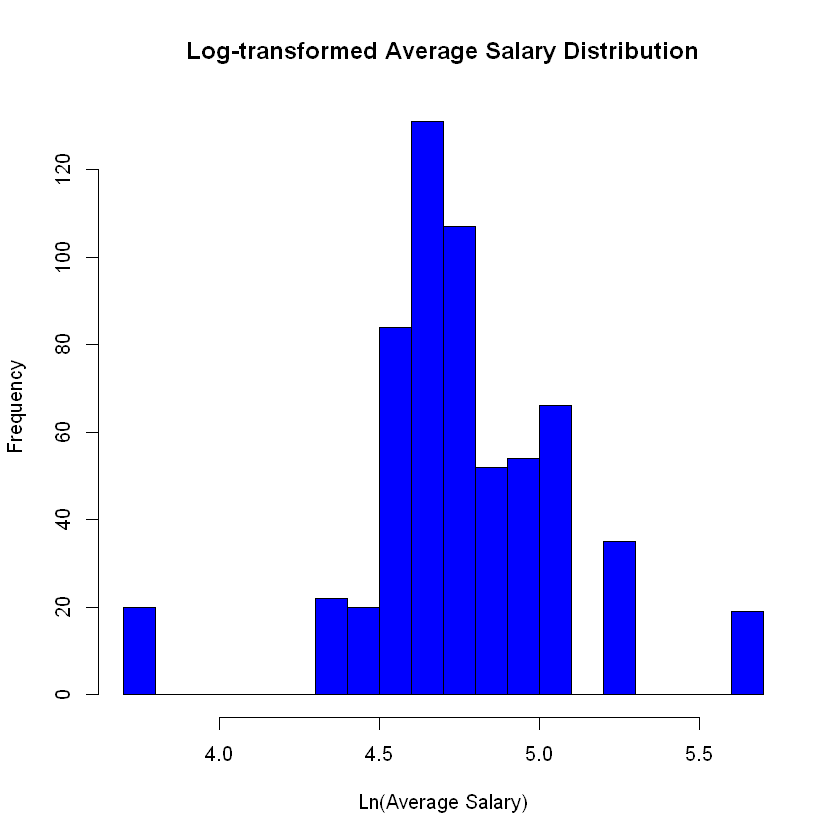

In [22]:
df$ln_avg_salary <- log(df$avg_salary)
hist(df$ln_avg_salary, breaks=20, main="Log-transformed Average Salary Distribution", xlab="Ln(Average Salary)", col="blue")

In [23]:
str(df)


'data.frame':	610 obs. of  21 variables:
 $ Job.Title        : Factor w/ 168 levels "AI Data Scientist",..: 152 48 48 48 48 48 62 48 161 48 ...
 $ Rating           : num  3.1 4.2 3.8 3.5 2.9 4.2 3.9 3.5 4.4 3.6 ...
 $ Size             : Factor w/ 9 levels "-1","1 to 50 employees",..: 4 6 4 7 8 8 3 4 6 8 ...
 $ Type.of.ownership: Factor w/ 13 levels "-1","College / University",..: 8 4 10 4 3 3 4 4 4 3 ...
 $ Sector           : Factor w/ 23 levels "-1","Accounting & Legal",..: 14 6 6 15 6 13 5 20 13 13 ...
 $ Revenue          : Factor w/ 14 levels "-1","$1 to $2 billion (USD)",..: 14 2 6 6 14 14 5 2 7 14 ...
 $ min_salary       : int  137 137 137 137 137 137 137 137 137 137 ...
 $ max_salary       : int  171 171 171 171 171 171 171 171 171 171 ...
 $ avg_salary       : int  154 154 154 154 154 154 154 154 154 154 ...
 $ job_state        : Factor w/ 39 levels " AL"," AZ"," CA",..: 25 35 15 15 25 3 15 15 3 11 ...
 $ company_age      : int  27 52 39 20 22 10 24 30 37 6 ...
 $ python        

# Transforming Size to avg_employees

In [24]:
# Extract minimum and maximum employee numbers
df$min_employees <- as.numeric(gsub(" .*", "", df$Size))
df$max_employees <- as.numeric(gsub(".*to ", "", gsub(" employees", "", df$Size)))

# Replace NA values which might occur due to parsing inconsistencies or special cases like "Unknown"
df$min_employees[is.na(df$min_employees)] <- 0
df$max_employees[is.na(df$max_employees)] <- 0

df$avg_employees <- (df$min_employees + df$max_employees) / 2

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [25]:
df$avg_employees[df$avg_employees == 0] <- 10000

head(df, 1)

Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,...,spark,aws,tableau,big_data,job_simp,seniority,ln_avg_salary,min_employees,max_employees,avg_employees
Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,...,0,1,0,0,data scientist,senior,5.036953,1001,5000,3000.5


# One Hot Encoding

In [26]:
unique(df$Type.of.ownership)
unique(df$Revenue)

[1] Nonprofit Organization         Company - Public              
 [3] Private Practice / Firm        Company - Private             
 [5] Government                     Subsidiary or Business Segment
 [7] Other Organization             Unknown                       
 [9] Hospital                       Self-employed                 
[11] College / University           Contract                      
13 Levels: -1 College / University Company - Private ... Unknown

[1] Unknown / Non-Applicable         $1 to $2 billion (USD)          
 [3] $100 to $500 million (USD)       $10+ billion (USD)              
 [5] $2 to $5 billion (USD)           $500 million to $1 billion (USD)
 [7] $5 to $10 billion (USD)          $10 to $25 million (USD)        
 [9] $25 to $50 million (USD)         $50 to $100 million (USD)       
[11] $1 to $5 million (USD)           $5 to $10 million (USD)         
[13] Less than $1 million (USD)      
14 Levels: -1 $1 to $2 billion (USD) ... Unknown / Non-Applicable

In [27]:
columns_to_encode <- c("Type.of.ownership", "Sector", "Revenue", "job_state", "job_simp", "seniority")


for (col in columns_to_encode) {
  new_col_name <- paste0(col, "_encoded") # Creating a new column name for the encoded version
  df[[new_col_name]] <- as.integer(factor(df[[col]])) # Assigning encoded values to the new column
}

# # One-hot encode the 'Type.of.ownership' column as an example
# df <- cbind(df, model.matrix(~ Type.of.ownership - 1, data = df))
# df <- cbind(df, model.matrix(~ Sector - 1, data = df))
# df <- cbind(df, model.matrix(~ Revenue - 1, data = df))
# df <- cbind(df, model.matrix(~ job_state - 1, data = df))
# df <- cbind(df, model.matrix(~ job_simp - 1, data = df))
# df <- cbind(df, model.matrix(~ seniority - 1, data = df))

# Choosing Numeric Values

In [36]:
numeric_df <- df[sapply(df, is.numeric)]

# Specify the skill columns
skill_columns <- c("python", "excel", "hadoop", "spark", "aws", "tableau", "big_data")

# Calculate the sum of skills for each row
numeric_df$skills_sum <- rowSums(numeric_df[, skill_columns])

# Calculate the decimal of skills for each row (number of skills possessed / total number of skills)
total_skills <- length(skill_columns)
numeric_df$skills_decimal <- numeric_df$skills_sum / total_skills

numeric_df <- numeric_df %>% 
  select(-python, -excel, -hadoop, -spark, -aws, -tableau, -big_data, -min_salary, -max_salary, -skills_sum,-min_employees, -max_employees)

# View the modified dataframe
head(numeric_df)

Rating,avg_salary,company_age,ln_avg_salary,avg_employees,Type.of.ownership_encoded,Sector_encoded,Revenue_encoded,job_state_encoded,job_simp_encoded,seniority_encoded,skills_decimal
3.1,154,27,5.036953,3000.5,7,14,13,25,3,3,0.1428571
4.2,154,52,5.036953,7500.5,3,6,1,35,3,2,0.2857143
3.8,154,39,5.036953,3000.5,9,6,5,15,3,2,0.4285714
3.5,154,20,5.036953,750.5,3,15,5,15,3,2,0.4285714
2.9,154,22,5.036953,125.5,2,6,13,25,3,2,0.2857143
4.2,154,10,5.036953,125.5,2,13,13,3,3,2,0.5714286


In [ ]:
library(ggplot2)
cor_matrix <- cor(numeric_df, use = "pairwise.complete.obs")
cor_long <- melt(cor_matrix)

ggplot(data = cor_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() + # This creates the heatmap tiles
  geom_text(aes(label = sprintf("%.2f", value)), color = "black", size = 3) + # Adds labels
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Correlation") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        axis.title = element_blank()) # Improve appearance

# Modelling using XGBoost

In [38]:
install.packages("xgboost")
library(xgboost)

# Splitting the data into training and testing sets
set.seed(123)  # For reproducibility
train_indices <- sample(1:nrow(numeric_df), size = floor(0.8 * nrow(numeric_df)))

train_data <- numeric_df[train_indices, ]
test_data <- numeric_df[-train_indices, ]

# Creating DMatrix objects
dtrain <- xgb.DMatrix(data = as.matrix(train_data[,-which(names(train_data) == "avg_salary")]), label = train_data$avg_salary)
dtest <- xgb.DMatrix(data = as.matrix(test_data[,-which(names(test_data) == "avg_salary")]), label = test_data$avg_salary)

params <- list(
  booster = "gbtree",
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 6,
  min_child_weight = 1,
  subsample = 0.5,
  colsample_bytree = 0.5
)

nrounds <- 100  # Number of boosting rounds

xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = nrounds,
  watchlist = list(train = dtrain, test = dtest),
  print_every_n = 10,
  early_stopping_rounds = 10,
  maximize = FALSE
)

# Making predictions
preds <- predict(xgb_model, dtest)

# Evaluating the model with RMSE
true_values <- test_data$avg_salary
rmse <- sqrt(mean((preds - true_values)^2))
cat("RMSE on test set:", rmse, "\n")

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'xgboost'


  These will not be installed


ERROR: Error in library(xgboost): there is no package called 'xgboost'


Now, we will try to make sense of the model using SHAP

In [ ]:
install.packages("DALEX")
library(DALEX)

# Compute SHAP values (this might take some time for large datasets or complex models)
shap_values <- predict(xgb_model, dtest, predcontrib = TRUE)

# Wrap your model in an explainer
explainer <- DALEX::explain(model = xgb_model, 
                            data = as.matrix(train_data[,-which(names(train_data) == "avg_salary")]), 
                            y = train_data$avg_salary)

# Use the variable_dropout() function to assess feature importance
vi <- model_parts(explainer, type = "dropout")

# Plotting feature importance
plot(vi)
